In [1]:
# Author: Reinald Adrian Pugoy P78077040

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time

from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Concatenate, Input, Multiply, Add
from keras.utils import np_utils
from keras.optimizers import Adam
import sklearn.metrics as metrics



Bad key "text.kerning_factor" on line 4 in
/home/renjie/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


In [2]:
#train = pd.read_csv("dataset/emnist-balanced-train.csv",delimiter = ',')
#test = pd.read_csv("dataset/emnist-balanced-test.csv", delimiter = ',')

# Set the dataset

train = pd.read_csv("dataset/mnist_train.csv")
test = pd.read_csv("dataset/mnist_test.csv")

mapp = pd.read_csv("dataset/emnist-balanced-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None, squeeze=True)

print("Train: %s, Test: %s, Map: %s" %(train.shape, test.shape, mapp.shape))

Train: (60000, 785), Test: (10000, 785), Map: (47,)


In [3]:
HEIGHT = 28
WIDTH = 28

train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
test_y_orig = test_y
test_y_orig = np.asarray(test_y_orig)
del test

test_y_actual = [chr(mapp[elemm]) for elemm in test_y_orig]


In [4]:
# Normalization
train_x = np.asarray(train_x)
test_x = np.asarray(test_x)
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [5]:
# No. of Classes
num_classes = train_y.nunique()

# One Hot Encoding
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (60000, 10)
test_y:  (10000, 10)


In [6]:
# Reshape image for CNN
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

# Partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.10, random_state=7)

In [7]:
# The code below lays down my proposed Triple CNN Blocks Architecture

input_shape = Input(shape=(HEIGHT, WIDTH,1))

par1 = (Conv2D(filters=12, kernel_size=(3,3), padding = 'same', use_bias=False, activation='relu'))(input_shape)
par1 = (BatchNormalization(center=True, scale=False))(par1)
par1 = (MaxPooling2D(pool_size=(2,2)))(par1)
par1 = (Conv2D(filters=24, kernel_size=(6,6) , padding = 'same', use_bias=False, activation='relu'))(par1)
par1 = (BatchNormalization(center=True, scale=False))(par1)
par1 = (MaxPooling2D(pool_size=(2,2)))(par1)
par1 = (Conv2D(filters=32, kernel_size=(6,6) , padding = 'same', use_bias=False, activation='relu'))(par1)
par1 = (BatchNormalization(center=True, scale=False))(par1)
par1 = (MaxPooling2D(pool_size=(2,2)))(par1)
par1 = (Flatten())(par1)
par1 = (Dense(units=200, activation='relu'))(par1)
par1 = (Dropout(0.5))(par1)

par2 = (Conv2D(filters=12, kernel_size=(5,5), padding = 'same', use_bias=False, activation='relu'))(input_shape)
par2 = (BatchNormalization(center=True, scale=False))(par2)
par2 = (MaxPooling2D(pool_size=(2,2)))(par2)
par2 = (Conv2D(filters=24, kernel_size=(3,3) , padding = 'same', use_bias=False, activation='relu'))(par2)
par2 = (BatchNormalization(center=True, scale=False))(par2)
par2 = (MaxPooling2D(pool_size=(2,2)))(par2)
par2 = (Conv2D(filters=32, kernel_size=(2,2) , padding = 'same', use_bias=False, activation='relu'))(par2)
par2 = (BatchNormalization(center=True, scale=False))(par2)
par2 = (MaxPooling2D(pool_size=(2,2)))(par2)
par2 = (Flatten())(par2)
par2 = (Dense(units=200, activation='relu'))(par2)
par2 = (Dropout(0.5))(par2)

par3 = (Conv2D(filters=128, kernel_size=(3,3), padding = 'same', use_bias=False, activation='relu'))(input_shape)
par3 = (BatchNormalization(center=True, scale=False))(par3)
par3 = (MaxPooling2D(pool_size=(2,2)))(par3)
par3 = (Conv2D(filters=64, kernel_size=(6,6) , padding = 'same', use_bias=False, activation='relu'))(par3)
par3 = (BatchNormalization(center=True, scale=False))(par3)
par3 = (MaxPooling2D(pool_size=(2,2)))(par3)
par3 = (Conv2D(filters=32, kernel_size=(6,6) , padding = 'same', use_bias=False, activation='relu'))(par3)
par3 = (BatchNormalization(center=True, scale=False))(par3)
par3 = (MaxPooling2D(pool_size=(2,2)))(par3)
par3 = (Flatten())(par3)
par3 = (Dense(units=200, activation='relu'))(par3)
par3 = (Dropout(0.5))(par3)

shared = (Concatenate()([par1, par2, par3]))
shared = (Dense(units=300, activation='relu'))(shared)
shared = (Dropout(0.5))(shared)
shared = (Dense(units=num_classes, activation='softmax'))(shared)

model = Model(input=input_shape, output=shared)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 12)   108         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 12)   300         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 28, 28, 128)  1152        input_1[0][0]                    
____________________________________________________________________________________________

/home/renjie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [8]:
# Model training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, batch_size=128, verbose=1, \
                    validation_data=(val_x, val_y))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 347s 6ms/step - loss: 0.2749 - accuracy: 0.9176 - val_loss: 0.3416 - val_accuracy: 0.8962
Epoch 2/10
54000/54000 [==============================] - 346s 6ms/step - loss: 0.0715 - accuracy: 0.9794 - val_loss: 0.0445 - val_accuracy: 0.9868
Epoch 3/10
54000/54000 [==============================] - 347s 6ms/step - loss: 0.0517 - accuracy: 0.9860 - val_loss: 0.0401 - val_accuracy: 0.9888
Epoch 4/10
54000/54000 [==============================] - 350s 6ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0551 - val_accuracy: 0.9865
Epoch 5/10
54000/54000 [==============================] - 352s 7ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0459 - val_accuracy: 0.9870
Epoch 6/10
54000/54000 [==============================] - 352s 7ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0481 - val_accuracy: 0.9893
Epoch 7/10
54000/54000 [==============================] - 353s 

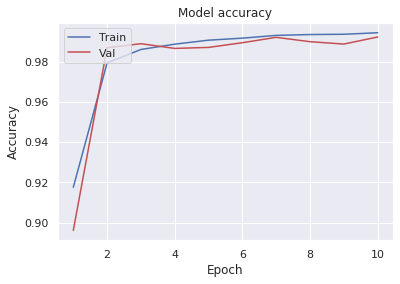

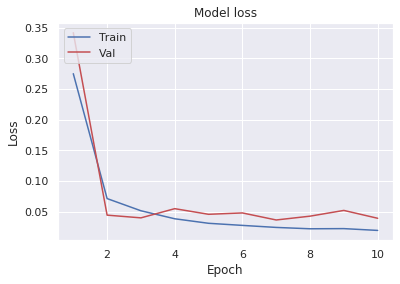

In [9]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plotgraph2(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plotgraph(epochs, acc, val_acc)
plotgraph2(epochs, loss, val_loss)

In [10]:
# We save the model here
ts = time.time() 
model.save("final_project"+str(ts)+".h5")

In [11]:
y_prob = model.predict(test_x) 
pred_y = y_prob.argmax(axis=-1)
pred_y_actual = [chr(mapp[elemm]) for elemm in pred_y]

In [12]:
# Additional code here for further analysis of results (eg. confusion matrix)

char_hits = {}
char_mishits = {}
char_mishits_inner = {}
correct_ctr = 0
wrong_ctr = 0
total_count = len(test_y_actual)
#histogram 

mishits_record = {}

#classes_47 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
confuse_matrix = np.zeros((10, 10))

for original, predicted in zip(test_y_actual, pred_y_actual):
    confuse_matrix[classes.index(original)][classes.index(predicted)] += 1
    
    if (original == predicted):
        if original in char_hits:
            char_hits[original] += 1
        else:
            char_hits[original] = 1
        correct_ctr += 1
    else:
        if original in char_mishits:
            char_mishits[original] += 1
        else:
            char_mishits[original] = 1
        
        if original not in mishits_record:
            mishits_record[original] = {}
            
        if predicted in mishits_record[original]:
            mishits_record[original][predicted] += 1
        else:
            mishits_record[original][predicted] = 1
            
        wrong_ctr += 1

confuse_matrix = np.transpose(confuse_matrix)
char_hits = {k: v for k, v in sorted(char_hits.items(), key=lambda item: item[0])}
char_mishits = {k: v for k, v in sorted(char_mishits.items(), key=lambda item: item[0])}

FROM THE TEST DATASET:  10000
CORRECT CLASSIFICATION STATISTICS
{'0': 976, '1': 1132, '2': 1019, '3': 1007, '4': 974, '5': 881, '6': 948, '7': 1022, '8': 967, '9': 1001}


Correct:  9927  or Test Accuracy: 0.9927


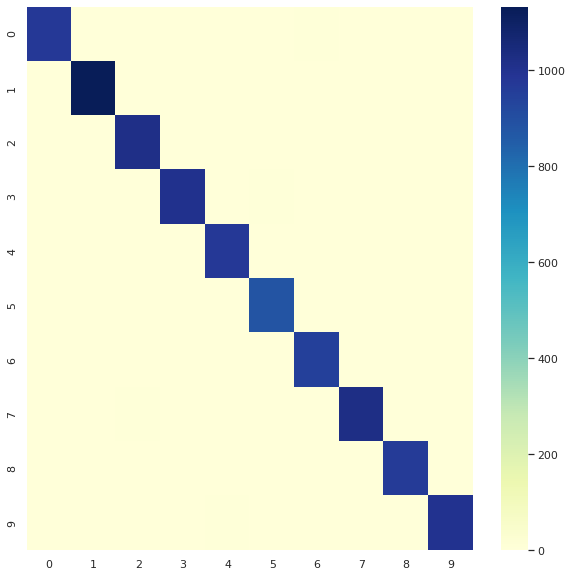

In [13]:
# Shows correct classification / accuracy results

print ("FROM THE TEST DATASET: ", total_count)
print ("======\nCORRECT CLASSIFICATION STATISTICS")
print (char_hits)
print ("\n")
print ("Correct: ", correct_ctr, " or Test Accuracy:", (correct_ctr/total_count))

# Heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(confuse_matrix, cmap="YlGnBu", xticklabels=char_hits.keys(), yticklabels=char_hits.keys())


MISCLASSIFICATION STATISTICS 
{'0': 4, '1': 3, '2': 13, '3': 3, '4': 8, '5': 11, '6': 10, '7': 6, '8': 7, '9': 8}


Wrong:  73 or Test Error:  0.0073


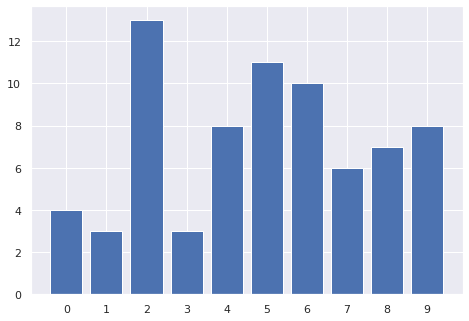

In [14]:
# On the other hand, this shows the misclassification / error results

print ("MISCLASSIFICATION STATISTICS ")
print (char_mishits)
print ("\n")
print ("Wrong: ", wrong_ctr, "or Test Error: ", (wrong_ctr/total_count))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(char_mishits.keys(), char_mishits.values())
plt.show()

CASE STUDY
Original Label: 2 
 But, misclassified as follows:
 {'7': 6, '1': 1, '0': 3, '8': 3}


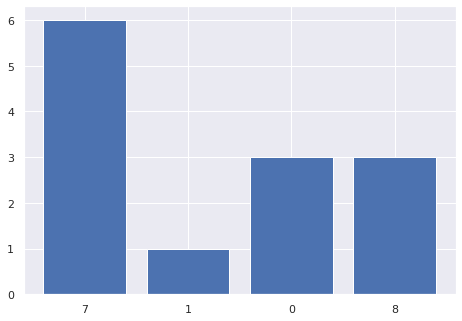

In [16]:
# Case Study / Analysis
which_char = str("2")

print ("CASE STUDY")
print ("Original Label: "+which_char+" \n But, misclassified as follows:\n", mishits_record[which_char])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mishits_record[which_char].keys(), mishits_record[which_char].values())
plt.show()
